# Excercise 1 - generate data

In [66]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [67]:
F = len("Norbert")
L = len("Podgorski")
N = (L+F) * 100

In [68]:
model_1=CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [69]:
samples_1  = model_1.sample(data={"N": N}, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [70]:
df_1 = samples_1.draws_pd()
df_1

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1591],y[1592],y[1593],y[1594],y[1595],y[1596],y[1597],y[1598],y[1599],y[1600]
0,0.0,0.0,0.01,1.71345,-0.444169,-0.36749,0.195246,0.149129,-0.746627,-1.1079,...,0.400512,1.56805,-0.571756,-1.84219,-0.818486,2.14238,-1.11692,-1.16458,-1.28364,-0.290088


In [71]:
model_2=CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [72]:
samples_2  = model_2.sample(data={"N": N}, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [73]:
df_2 = samples_2.draws_pd()
df_2

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1591],y[1592],y[1593],y[1594],y[1595],y[1596],y[1597],y[1598],y[1599],y[1600]
0,0.0,0.0,-2.39024,0.951353,0.311571,0.238491,-0.811168,-0.093815,-0.259732,-0.685876,...,3.09427,1.41254,2.69524,0.881376,4.80084,1.71592,0.312806,-0.738055,-2.17466,1.36421


# Excercise 2 - compare normal and student models for data from first file

In [74]:
model_3=CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [75]:
samples_3_1  = model_3.sample(data={"N": N, "y": df_1.iloc[:, 1603-N:].values.reshape((N,))})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)



chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [76]:
df_3_1 = samples_3_1.draws_pd()
df_3_1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1591],y_hat[1592],y_hat[1593],y_hat[1594],y_hat[1595],y_hat[1596],y_hat[1597],y_hat[1598],y_hat[1599],y_hat[1600]
0,-3525.75,0.993760,0.950708,2.0,3.0,0.0,3526.27,2.20974,0.206534,-1.94434,...,-0.524324,0.210169,-0.146243,-2.770840,0.534068,2.399170,-0.938629,2.853160,0.513648,0.930614
1,-3525.75,0.850750,0.950708,1.0,3.0,0.0,3526.58,2.20974,0.206534,-1.94434,...,3.992520,0.861708,2.129930,3.311060,3.146560,-1.479840,-1.772580,-2.484960,0.273621,1.288430
2,-3525.92,0.969947,0.950708,2.0,3.0,0.0,3526.03,2.20942,0.164068,-1.95755,...,1.349860,0.990114,-3.738710,0.203274,-2.656820,1.089820,-3.165990,3.131580,-0.717952,-1.147130
3,-3525.88,0.775190,0.950708,2.0,3.0,0.0,3527.75,2.19261,0.232115,-1.93225,...,-2.778370,1.200270,0.148633,-0.921599,3.056420,2.010050,2.511340,-0.433280,-3.498160,-2.684660
4,-3525.93,0.954131,0.950708,2.0,3.0,0.0,3526.30,2.17232,0.214834,-1.93269,...,2.112990,0.789090,1.098020,3.649400,0.845858,-0.589287,0.822166,-1.762780,-0.601787,-4.503710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-3527.30,0.771116,0.773239,2.0,3.0,0.0,3529.12,2.21224,0.294995,-1.91850,...,1.680550,1.788770,-0.353271,2.475620,-1.248500,0.974911,-1.069180,2.319850,1.369720,-0.274328
3996,-3527.98,0.887546,0.773239,1.0,1.0,0.0,3528.12,2.20399,0.315761,-1.91029,...,-1.059470,2.509280,-0.549388,2.408190,-1.011860,2.557930,-1.000970,3.773090,0.245056,0.541991
3997,-3528.15,0.966965,0.773239,1.0,1.0,0.0,3528.51,2.19748,0.320122,-1.90726,...,-3.043230,-1.363160,1.446440,1.415290,-0.484174,-2.279850,-2.595490,-0.762217,-0.367574,-2.206880
3998,-3527.59,0.997688,0.773239,3.0,7.0,0.0,3528.51,2.22558,0.298627,-1.92102,...,0.454348,0.129743,2.435050,-0.455378,-0.448562,0.898126,-2.580900,3.210080,4.774390,-2.099260


In [77]:
model_4=CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [78]:
samples_4_1  = model_4.sample(data={"N": N, "y": df_1.iloc[:, 1603-N:].values.reshape((N,))})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling completed                       
chain 4 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [79]:
df_4_1 = samples_4_1.draws_pd()
df_4_1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1591],y_hat[1592],y_hat[1593],y_hat[1594],y_hat[1595],y_hat[1596],y_hat[1597],y_hat[1598],y_hat[1599],y_hat[1600]
0,-2582.91,0.888679,0.640741,2.0,7.0,0.0,2587.00,0.821541,-0.042701,3.00160,...,0.614154,-0.364829,2.299130,-2.128950,-1.220510,-0.524240,2.261800,0.419167,0.435309,-0.203111
1,-2585.02,0.924199,0.640741,2.0,7.0,0.0,2585.81,0.860594,-0.072244,2.81210,...,-0.112430,0.867338,0.283544,0.659513,3.659790,-0.110583,0.232509,0.048340,1.099450,0.248330
2,-2582.08,0.978409,0.640741,2.0,3.0,0.0,2586.51,0.838894,-0.036530,3.12923,...,2.828040,-0.475933,-0.534274,-0.562014,0.131235,0.445325,-0.257892,0.658588,-0.996682,-0.921136
3,-2581.10,0.981733,0.640741,2.0,3.0,0.0,2582.32,0.840870,-0.021224,3.03307,...,-0.277614,-0.428071,0.408924,0.518293,-2.488230,-1.164340,-1.220150,0.550864,-0.408723,-0.401354
4,-2580.79,0.839183,0.640741,2.0,3.0,0.0,2582.65,0.852184,-0.013219,3.06652,...,0.532497,-0.681004,-0.809658,-3.446160,-0.590223,-0.885933,0.415903,0.016175,-0.395837,0.341841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2585.68,0.746631,0.649801,2.0,3.0,0.0,2587.82,0.806847,-0.061054,3.00749,...,-0.005316,-1.324070,-0.332300,-0.208611,2.723270,0.748121,0.335524,-1.462500,-0.471806,-0.085685
3996,-2581.55,1.000000,0.649801,3.0,7.0,0.0,2585.25,0.857528,-0.022019,2.85376,...,-3.091640,-0.037439,-1.990180,0.092559,-0.946010,-0.780112,-0.591031,-1.112250,0.304230,-0.896212
3997,-2582.38,0.850207,0.649801,3.0,7.0,0.0,2584.21,0.865242,0.029627,2.85233,...,3.325040,2.842870,-0.705605,-0.021453,3.778880,0.590980,2.254890,-1.299370,-0.632773,0.335571
3998,-2582.69,0.985148,0.649801,2.0,7.0,0.0,2583.38,0.875507,0.037765,2.95684,...,0.672204,-0.476566,-0.698293,-0.071007,-5.107330,-1.237490,0.706394,-0.656521,3.063920,-0.727530


In [80]:
comparison = az.compare(
    {"Normal model": az.from_cmdstanpy(samples_3_1), "Student model": az.from_cmdstanpy(samples_4_1)},
    ic="loo",
    scale="deviance")
comparison

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Student model,0,5162.311468,4.190623,0.000000,1.000000e+00,99.393176,0.000000,False,deviance
Normal model,1,7091.533755,32.609563,1929.222287,4.240519e-10,340.080822,275.697395,True,deviance


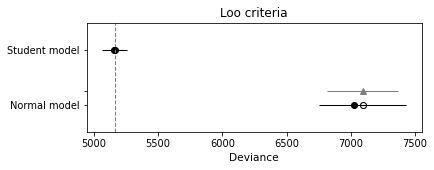

In [81]:
az.plot_compare(comparison, insample_dev=True)
plt.title("Loo criteria")
plt.show()

In [82]:
comparison = az.compare(
    {"Normal model": az.from_cmdstanpy(samples_3_1), "Student model": az.from_cmdstanpy(samples_4_1)},
    ic="waic",
    scale="deviance")
comparison

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Student model,0,5162.309640,4.189709,0.000000,1.0,99.392825,0.000000,False,deviance
Normal model,1,7095.373401,34.529386,1933.063761,0.0,342.089177,277.862271,True,deviance


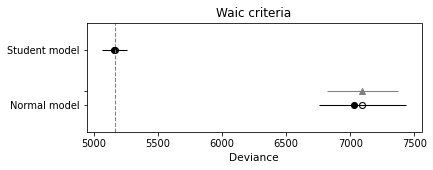

In [83]:
az.plot_compare(comparison, insample_dev=True)
plt.title("Waic criteria")
plt.show()

##### The lower the values of the above indicators, the higher the efficiency of the model used. <br>
##### Above statistics and plots indicate the advantage of the student model over the normal model. <br><br><br>

# Excercise 3 - compare models with different numbers of predictors


In [84]:
model_5=CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [85]:
samples_5_1 =  model_5.sample(data={"N": N, "y": df_2.iloc[:, 6405-N:].values.reshape((N,)), "K": 1, "X": df_2.iloc[:,2:6402-3*N].T})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [86]:
df_5_1 = samples_5_1.draws_pd()
df_5_1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,beta[1],mu[1],...,y_hat[1591],y_hat[1592],y_hat[1593],y_hat[1594],y_hat[1595],y_hat[1596],y_hat[1597],y_hat[1598],y_hat[1599],y_hat[1600]
0,-1499.76,0.999939,0.784674,3.0,7.0,0.0,1499.91,1.55205,1.95642,-4.67630,...,4.33439,3.417010,2.805740,6.10233,1.983430,0.042752,0.453462,-0.495434,3.315790,1.471470
1,-1499.76,0.962434,0.784674,2.0,3.0,0.0,1500.22,1.53458,1.93765,-4.63145,...,4.23085,-0.038495,0.406082,1.80372,3.080000,5.179020,1.166240,-1.675050,2.954040,1.355350
2,-1499.85,0.986090,0.784674,2.0,7.0,0.0,1499.96,1.56845,1.93887,-4.63437,...,2.67271,2.461250,4.311980,2.89879,1.630330,2.471080,0.289861,-0.854563,2.177530,1.106350
3,-1500.42,0.942493,0.784674,2.0,3.0,0.0,1500.64,1.57457,1.97057,-4.71012,...,0.09747,1.232240,1.555630,1.93762,3.550310,4.696180,2.490960,-0.083678,3.172010,1.723190
4,-1500.53,0.977223,0.784674,3.0,7.0,0.0,1501.17,1.54671,1.98775,-4.75119,...,1.52632,2.092360,3.869060,3.26185,0.361248,4.178780,1.339160,0.214012,0.908298,-0.243531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1500.39,1.000000,0.798707,2.0,3.0,0.0,1501.75,1.58293,1.92197,-4.59396,...,1.37075,0.989311,4.408320,3.32662,2.875810,0.042092,0.207399,1.688830,2.157990,1.293850
3996,-1499.70,0.893033,0.798707,1.0,3.0,0.0,1501.54,1.53757,1.93573,-4.62687,...,3.03545,0.987516,4.571850,3.00325,3.427200,-0.128866,-1.060390,-0.225875,2.103760,0.129476
3997,-1499.85,0.862029,0.798707,2.0,3.0,0.0,1501.08,1.53103,1.92914,-4.61111,...,3.39865,2.214000,1.337940,3.45596,1.852500,-0.126929,2.076230,-1.797710,2.021000,1.208180
3998,-1500.13,0.958616,0.798707,2.0,3.0,0.0,1500.38,1.52648,1.95748,-4.67885,...,1.54376,2.749440,5.470310,3.85836,0.472148,0.914440,-1.671190,-0.328826,2.478780,2.440380


In [93]:
samples_5_2 =  model_5.sample(data={"N": N, "y": df_2.iloc[:, 6405-N:].values.reshape((N,)), "K": 2, "X": df_2.iloc[:,2:6402-2*N].values.reshape((N,2))})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:04 Iteration: 1900 / 2000 [ 95%]  (Sampling)




chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [94]:
df_5_2 = samples_5_2.draws_pd()
df_5_2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,beta[1],beta[2],...,y_hat[1591],y_hat[1592],y_hat[1593],y_hat[1594],y_hat[1595],y_hat[1596],y_hat[1597],y_hat[1598],y_hat[1599],y_hat[1600]
0,-2250.65,1.000000,0.740051,3.0,7.0,0.0,2251.15,2.56328,0.112824,-0.027565,...,-1.220380,1.096980,3.619770,4.351830,-4.509990,-1.224340,-1.735010,-1.593880,1.455570,-0.863396
1,-2252.33,0.835197,0.740051,2.0,3.0,0.0,2253.72,2.57224,0.189233,-0.026656,...,-1.931610,3.414270,-1.744310,0.879667,-1.266800,0.169975,-0.276091,1.394150,0.488543,1.781200
2,-2249.18,0.939674,0.740051,2.0,3.0,0.0,2253.57,2.49507,0.129394,-0.061077,...,0.449194,-1.388340,3.044360,2.091270,0.477800,-2.264010,0.563343,-0.222605,-0.190994,-1.625280
3,-2249.61,0.962910,0.740051,3.0,7.0,0.0,2250.11,2.41597,0.100599,-0.025862,...,-1.232770,4.453590,0.169813,2.122290,-2.506000,2.636410,-1.879980,-0.845018,-1.641240,2.384930
4,-2252.26,0.806399,0.740051,3.0,7.0,0.0,2253.04,2.55737,0.011046,0.082691,...,-1.958890,5.441640,2.451520,5.554660,2.088230,3.224300,1.105240,5.891760,-2.655330,-0.656050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2252.82,0.847117,0.815140,2.0,3.0,0.0,2255.54,2.57462,0.165481,0.059916,...,-2.194060,-8.267080,-1.525450,-2.846240,-3.849710,1.446420,0.809990,4.170620,0.945830,2.608670
3996,-2255.76,0.805565,0.815140,3.0,7.0,0.0,2257.99,2.37390,0.056928,-0.191331,...,-0.395103,0.122592,-3.441990,2.717940,-2.874670,-0.248167,-0.412784,0.438487,1.049720,1.189850
3997,-2252.83,0.902953,0.815140,3.0,7.0,0.0,2257.87,2.36773,0.054825,-0.099305,...,-0.705639,-3.233010,2.669170,1.340790,0.112787,-1.474850,0.174327,4.309230,-1.388030,-3.143270
3998,-2250.74,1.000000,0.815140,3.0,7.0,0.0,2252.93,2.54616,0.085375,0.058792,...,-3.004100,0.620659,-1.628140,0.270261,1.806570,-2.183890,5.891160,-1.500910,1.176050,-2.980760


In [95]:
samples_5_3 =  model_5.sample(data={"N": N, "y": df_2.iloc[:, 6405-N:].values.reshape((N,)), "K": 3, "X": df_2.iloc[:,2:6402-N].values.reshape((N,3))})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling completed                       
chain 4 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [96]:
df_5_3 = samples_5_3.draws_pd()
df_5_3

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,beta[1],beta[2],...,y_hat[1591],y_hat[1592],y_hat[1593],y_hat[1594],y_hat[1595],y_hat[1596],y_hat[1597],y_hat[1598],y_hat[1599],y_hat[1600]
0,-2252.62,0.486535,0.826557,2.0,3.0,0.0,2253.55,2.40362,-0.114145,0.013081,...,2.255320,1.524740,0.580807,0.172088,2.432490,-1.083250,0.797974,0.342027,-0.898852,-1.447260
1,-2252.29,0.922357,0.826557,2.0,3.0,0.0,2256.24,2.53648,-0.037064,0.300516,...,-2.693070,-1.055560,0.058855,5.255700,-1.034960,-1.043500,0.456444,-0.307136,5.466470,-1.406500
2,-2247.03,1.000000,0.826557,2.0,3.0,0.0,2251.60,2.44818,0.042587,0.130770,...,-1.037340,-0.513240,0.098810,2.909460,-2.221380,1.441520,-1.202210,-0.646952,0.742511,-2.404500
3,-2248.28,0.741577,0.826557,2.0,3.0,0.0,2249.73,2.50348,-0.065491,0.137365,...,2.894850,-1.197790,2.943440,6.469250,0.755402,-3.166370,-1.853280,0.181893,-0.711031,-0.536654
4,-2248.02,1.000000,0.826557,3.0,7.0,0.0,2248.83,2.50701,-0.038374,0.146022,...,2.747860,-2.123960,-1.780410,0.552634,1.636940,3.660740,-2.830360,-2.617140,-1.560370,-2.476900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2249.00,0.787287,0.792844,2.0,3.0,0.0,2253.25,2.41415,-0.059830,0.056592,...,-3.770860,-2.151150,-0.119923,0.703274,-3.121060,0.753864,0.490381,1.538900,-2.256820,-2.112620
3996,-2248.95,0.979707,0.792844,3.0,7.0,0.0,2251.05,2.44871,0.064896,0.038576,...,-0.258519,0.304989,0.708534,3.918510,4.823890,-2.908220,-3.048890,1.912440,-1.277400,-2.476750
3997,-2249.13,0.967052,0.792844,3.0,7.0,0.0,2251.07,2.44196,-0.110493,0.104880,...,2.519890,-3.395310,3.214510,1.481460,-0.234638,1.136860,-1.316870,1.505830,-0.701872,-6.222930
3998,-2248.99,0.917482,0.792844,2.0,3.0,0.0,2251.35,2.40099,-0.012532,0.058884,...,-2.399160,0.101982,-4.196210,2.742490,0.774384,-1.554060,1.001950,1.629560,-5.477870,4.065870


In [99]:
comparison = az.compare(
    {"Model_1_predictor": az.from_cmdstanpy(samples_5_1), "Model_2_predictor": az.from_cmdstanpy(samples_5_2), "Model_3_predictor": az.from_cmdstanpy(samples_5_3)},
    ic="waic",
    scale="deviance")
comparison

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Model_1_predictor,0,5944.620980,1.913283,0.000000,1.000000e+00,54.516466,0.000000,False,deviance
Model_3_predictor,1,7443.656565,3.901514,1499.035585,1.824912e-11,54.498348,61.168247,False,deviance
Model_2_predictor,2,7445.760493,3.064290,1501.139513,0.000000e+00,54.707866,61.243103,False,deviance


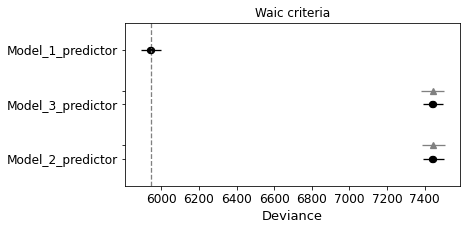

In [100]:
az.plot_compare(comparison, insample_dev=True)
plt.title("Waic criteria")
plt.show()

In [101]:
comparison = az.compare(
    {"Model_1_predictor": az.from_cmdstanpy(samples_5_1), "Model_2_predictor": az.from_cmdstanpy(samples_5_2), "Model_3_predictor": az.from_cmdstanpy(samples_5_3)},
    ic="loo",
    scale="deviance")
comparison

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Model_1_predictor,0,5944.620802,1.913195,0.000000,1.000000e+00,54.516451,0.000000,False,deviance
Model_3_predictor,1,7443.656679,3.901571,1499.035876,0.000000e+00,54.498354,61.168240,False,deviance
Model_2_predictor,2,7445.760308,3.064198,1501.139506,5.440093e-15,54.707839,61.243068,False,deviance


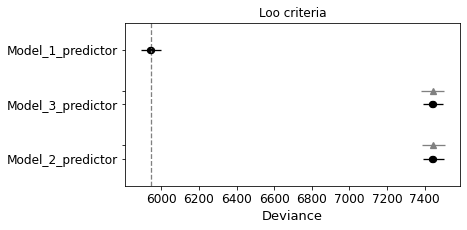

In [102]:
az.plot_compare(comparison, insample_dev=True)
plt.title("Loo criteria")
plt.show()

##### The model with one predictor turns out to be the best - as in the previous analysis - it has lower values of the considered indicators.